In [1]:
# importing all needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import matplotlib.style as style
%matplotlib inline
# from pandas.plotting import scatter_matrix

In [2]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import boxcox

In [3]:
# loading the data
df = pd.read_csv('life_data.csv')
df.head()

,Country,Year,log_GDP,health_expense,HIV_death_rate,avg_immunity,life_expectancy
0,Afghanistan,2012,2.835392,11.67,0.860835,70.666667,62.21
1,Albania,2012,3.626099,9.71,0.052744,98.000000,75.18
2,Algeria,2012,3.747584,9.99,1.050335,96.333333,75.76
3,Angola,2012,3.707579,5.57,76.613765,59.666667,60.36
4,Argentina,2012,4.143788,8.74,3.854362,93.333333,76.21


In [4]:
# # splitting the data into test and train sets
# y = df.life_expectancy
# x = df.drop('life_expectancy', axis=1)

In [5]:
# # 80-20 split (0.2 = 20% testing)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# x_train.head()

In [7]:
# x_train.shape

In [8]:
print (f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 116 rows and 12 columns


In [9]:
# gives us statistical info about the numerical variables. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,116.0,2.012000e+03,0.000000e+00,2012.00000,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03
total_population,116.0,3.450720e+07,1.223401e+08,88303.00000,3.293610e+06,9.392102e+06,2.621227e+07,1.263066e+09
GDP,116.0,7.955634e+03,1.284370e+04,251.72017,1.351099e+03,4.026094e+03,8.147934e+03,8.507618e+04
health_expense,116.0,1.082284e+01,4.125105e+00,3.28000,7.572500e+00,1.075500e+01,1.334250e+01,2.572000e+01
HDI,116.0,6.510345e-01,1.415719e-01,0.33800,5.320000e-01,6.850000e-01,7.657500e-01,9.200000e-01
HIV_death_rate,116.0,5.192338e+01,1.135286e+02,0.04301,1.122393e+00,5.195368e+00,3.212960e+01,6.616461e+02
hep_B_immunity,116.0,8.714655e+01,1.453945e+01,30.00000,8.275000e+01,9.250000e+01,9.700000e+01,9.900000e+01
polio_immunity,116.0,8.831897e+01,1.207484e+01,42.00000,8.400000e+01,9.300000e+01,9.700000e+01,9.900000e+01
BCG_immunity,116.0,9.219828e+01,1.143087e+01,24.00000,9.075000e+01,9.600000e+01,9.900000e+01,9.900000e+01
adult_mortality_rate,116.0,1.901997e+02,9.030674e+01,56.48000,1.263250e+02,1.702500e+02,2.403500e+02,4.785000e+02


In [10]:
## Gives us information about the features. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 12 columns):
Country                 116 non-null object
Year                    116 non-null int64
total_population        116 non-null float64
GDP                     116 non-null float64
health_expense          116 non-null float64
HDI                     116 non-null float64
HIV_death_rate          116 non-null float64
hep_B_immunity          116 non-null int64
polio_immunity          116 non-null int64
BCG_immunity            116 non-null int64
adult_mortality_rate    116 non-null float64
life_expectancy         116 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 11.0+ KB


In [11]:
## Gives use the count of different types of objects.
df.dtypes.value_counts()

float64    7
int64      4
object     1
dtype: int64

In [12]:
# Checking for null values
df.isnull().sum()

Country                 0
Year                    0
total_population        0
GDP                     0
health_expense          0
HDI                     0
HIV_death_rate          0
hep_B_immunity          0
polio_immunity          0
BCG_immunity            0
adult_mortality_rate    0
life_expectancy         0
dtype: int64

# Plotting to see all the features

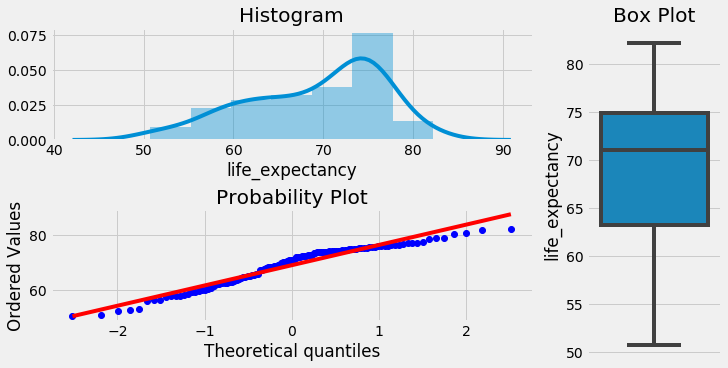

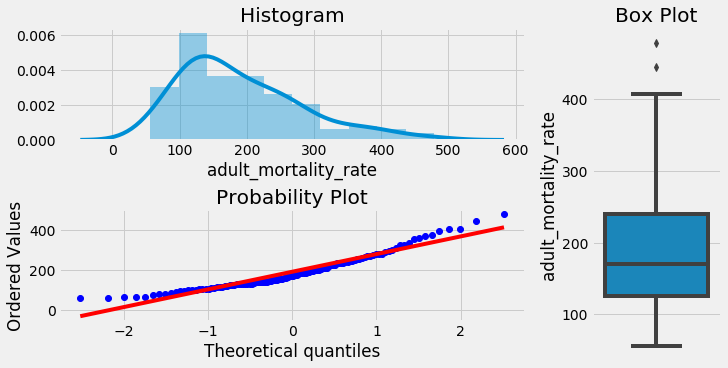

In [15]:
def plotting_3_chart(df, feature):
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(10,5))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df, 'life_expectancy')
plotting_3_chart(df, 'adult_mortality_rate')

## These two charts above can tell us a lot about our target variable.

- Our target variable, life_expectancy is NOT normally distributed.
- Our target variable is left-skewed.

In [14]:
#skewness and kurtosis
print("Skewness: " + str(df['life_expectancy'].skew()))
print("Kurtosis: " + str(df['life_expectancy'].kurt()))

Skewness: -0.5823312800398773
Kurtosis: -0.5587841214904765


## We can fix this by using different types of transformation (more on this later). 

## However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

In [10]:
## Getting the correlation of all the features with target variable. 
(df.corr()**2)["life_expectancy"].sort_values(ascending = False)[1:]

adult_mortality_rate    0.892246
HDI                     0.784383
polio_immunity          0.380406
HIV_death_rate          0.359721
GDP                     0.248748
hep_B_immunity          0.199220
BCG_immunity            0.041119
health_expense          0.034753
total_population        0.001563
Year                         NaN
Name: life_expectancy, dtype: float64

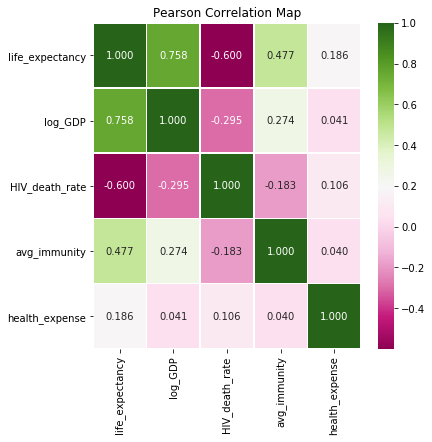

In [18]:
plotting_df = df[['life_expectancy', 'log_GDP', 'HIV_death_rate', 'avg_immunity', 'health_expense']]

fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(plotting_df.corr(), annot = True, linewidths=0.5, fmt = ".3f", ax=ax, cmap="PiYG")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.savefig('corr_fig.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [13]:
co_rr_l = plotting_df.corr()

cmap=sns.diverging_palette(5, 250, as_cmap=True)

co_rr_l.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)
# plt.show()
# plt.savefig('corr_table.png', 
#             dpi=300, bbox_inches='tight')

,life_expectancy,log_GDP,HIV_death_rate,avg_immunity,health_expense
life_expectancy,1,0.76,-0.6,0.48,0.19
log_GDP,0.76,1,-0.29,0.27,0.041
HIV_death_rate,-0.6,-0.29,1,-0.18,0.11
avg_immunity,0.48,0.27,-0.18,1,0.04
health_expense,0.19,0.041,0.11,0.04,1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


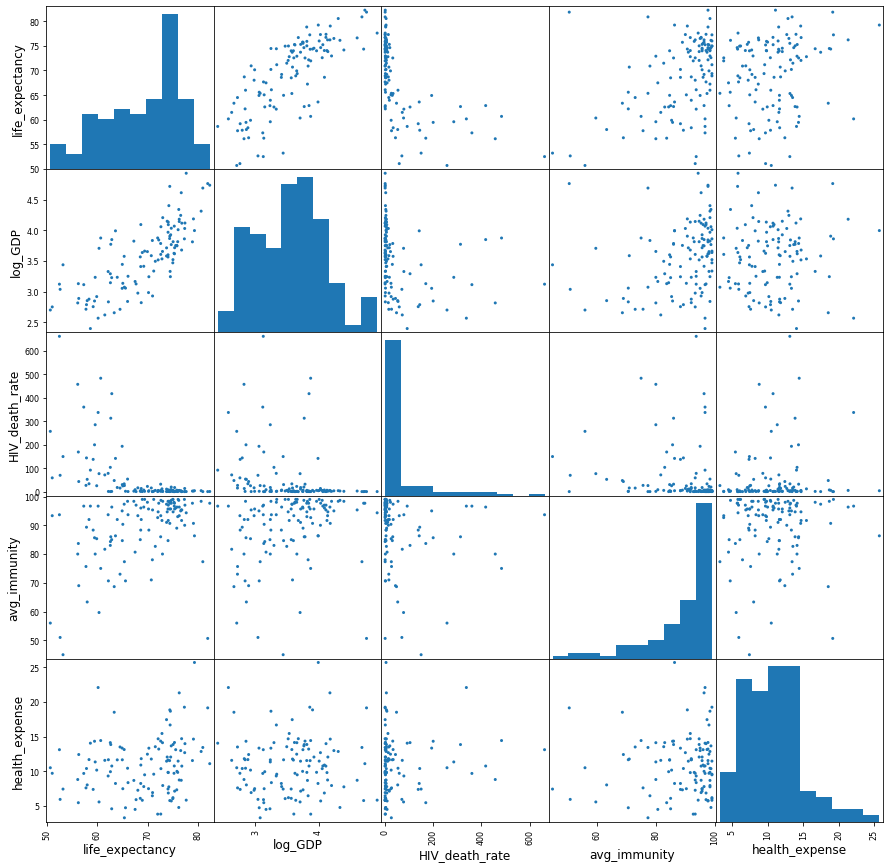

In [21]:
axes = pd.plotting.scatter_matrix(plotting_df, alpha=1, figsize=(15, 15), diagonal='hist', grid=True)
corr = df.corr().as_matrix()

# for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
#     axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)
plt.savefig('corr_fig2.png', 
            dpi=300, bbox_inches='tight')
plt.show()

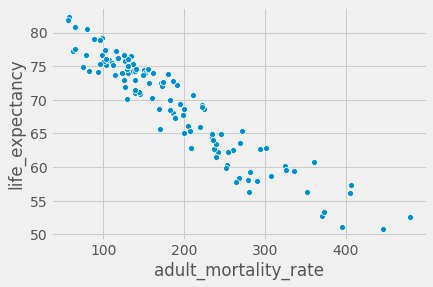

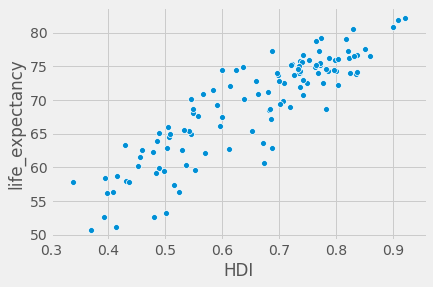

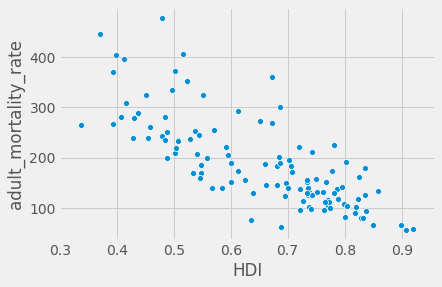

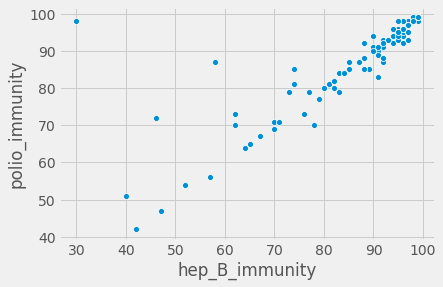

In [37]:
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (6,4))
    sns.scatterplot(y = y, x = x);

customized_scatterplot(df.life_expectancy, df.adult_mortality_rate)
customized_scatterplot(df.life_expectancy, df.HDI)
customized_scatterplot(df.adult_mortality_rate, df.HDI)
customized_scatterplot(df.polio_immunity, df.hep_B_immunity)

## Assumptions of Regression

- Linearity ( Correct functional form )
- Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
- Independence of Errors ( vs Autocorrelation )
- Multivariate Normality ( Normality of Errors )
- No or little Multicollinearity.

### Linearity ( Correct functional form ) Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

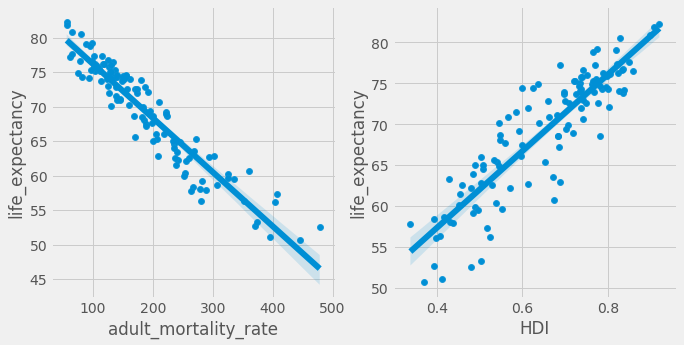

In [107]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey=False)
## Scatter plotting for adult_mortality_rate and life_expectancy. 
sns.scatterplot( x = df.adult_mortality_rate, y = df.life_expectancy,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=df.adult_mortality_rate, y=df.life_expectancy, ax=ax1)

## Scatter plotting for HDI and life_expectancy. 
sns.scatterplot(x = df.HDI,y = df.life_expectancy, ax=ax2)
## regression line for HDI and life_expectancy. 
sns.regplot(x=df.HDI, y=df.life_expectancy, ax=ax2);

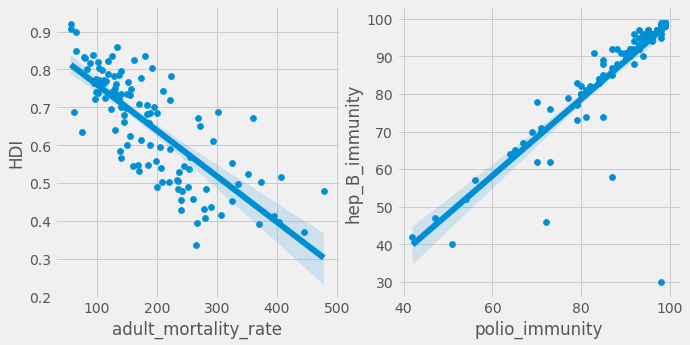

In [108]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (10,5), ncols=2, sharey=False)
## Scatter plotting for adult_mortality_rate and HDI. 
sns.scatterplot( x = df.adult_mortality_rate, y = df.HDI,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=df.adult_mortality_rate, y=df.HDI, ax=ax1)

## Scatter plotting for polio_immunity and hep_B_immunity. 
sns.scatterplot(x = df.polio_immunity,y = df.hep_B_immunity, ax=ax2)
## regression line for polio_immunity and hep_B_immunity. 
sns.regplot(x=df.polio_immunity, y=df.hep_B_immunity, ax=ax2);

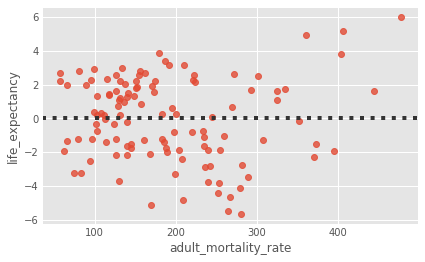

In [95]:
# Checking for residuals

plt.subplots(figsize = (6,4))
sns.residplot(df.adult_mortality_rate, df.life_expectancy);

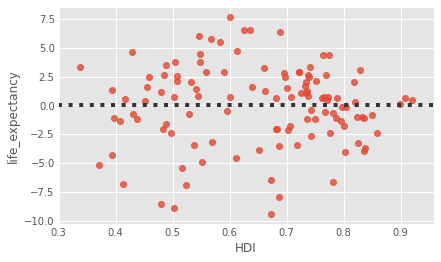

In [96]:
# Checking for residuals

plt.subplots(figsize = (6,4))
sns.residplot(df.HDI, df.life_expectancy);

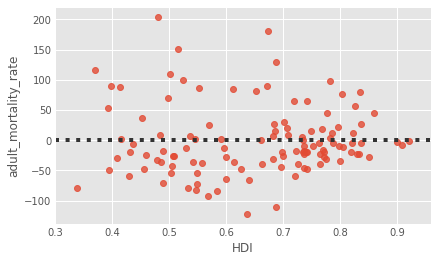

In [97]:
# Checking for residuals

plt.subplots(figsize = (6,4))
sns.residplot(df.HDI, df.adult_mortality_rate);

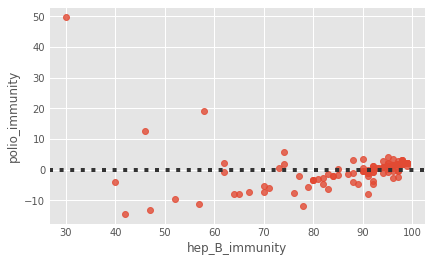

In [99]:
# Checking for residuals

plt.subplots(figsize = (6,4))
sns.residplot(df.hep_B_immunity, df.polio_immunity);

### Multivariate Normality ( Normality of Errors): 
The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram or a Q-Q-Plot can check whether the target variable is normally distributed or not. The goodness of fit test, e.g., the Kolmogorov-Smirnov test or can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable.

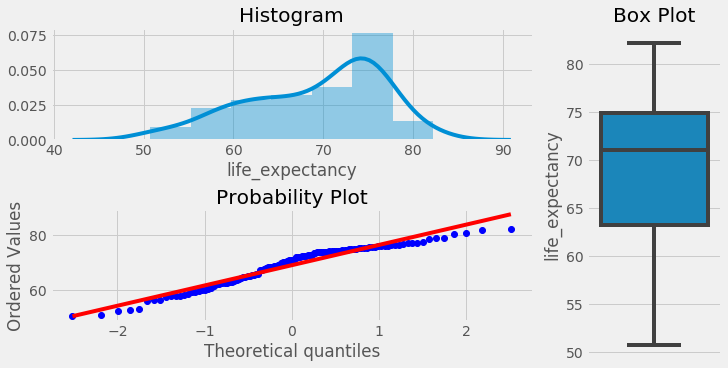

In [112]:
plotting_3_chart(df, 'life_expectancy')

### Now, let's make sure that the target variable follows a normal distribution.

In [194]:
plotting_df = df[['total_population', 'GDP', 'health_expense', 'HDI', 'HIV_death_rate',
                 'hep_B_immunity', 'polio_immunity', 'BCG_immunity','adult_mortality_rate', 'life_expectancy']]

data = plotting_df
data1 = plotting_df
data2 = plotting_df
data3 = plotting_df
data4 = plotting_df
data5 = plotting_df


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


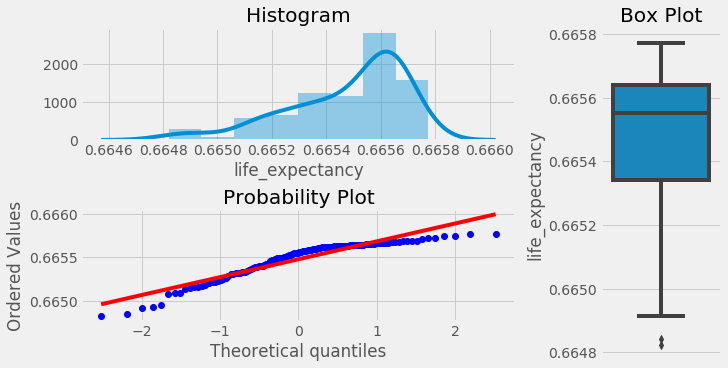

In [195]:


## trainsforming target variable using numpy.log1p, 
data['life_expectancy'] = boxcox(plotting_df.life_expectancy, -1.5)

## Plotting the newly transformed response variable
plotting_3_chart(data, 'life_expectancy')

In [170]:
# from scipy.stats import shapiro

# normality test
stat, p = shapiro(df.life_expectancy)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)


In [166]:
# from scipy.stats import anderson

# normality test
result = anderson(df.life_expectancy)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.448
15.000: 0.558, data does not look normal (reject H0)
10.000: 0.635, data does not look normal (reject H0)
5.000: 0.762, data does not look normal (reject H0)
2.500: 0.889, data does not look normal (reject H0)
1.000: 1.057, data does not look normal (reject H0)


In [172]:
# from scipy.stats import normaltest
# D’Agostino’s K^2 Test

# normality test
stat1, p1 = normaltest(df.life_expectancy)
print('Statistics=%.3f, p=%.3f' % (stat1, p1))
# interpret
alpha = 0.05
if p1 > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=8.765, p=0.012
Sample does not look Gaussian (reject H0)


In [69]:
## transforming target variable 
# plotting_df = df[['total_population', 'GDP', 'health_expense', 'HDI', 'HIV_death_rate',
#                  'hep_B_immunity', 'polio_immunity', 'BCG_immunity','adult_mortality_rate', 'life_expectancy']]

data1 = plotting_df
data1['adult_mortality_rate'] = boxcox(plotting_df.adult_mortality_rate, 1)

print('DATA1 : boxcox(NONE)')

print('\n\n')
print("Shapiro-Wilk Test:\n")
# normality test
stat, p0 = shapiro(data1.adult_mortality_rate)
print('Statistics=%.3f, p=%.5f' % (stat, p0))
# interpret
alphaa = 0.05
if p0 > alphaa:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    

print('\n\n')
print("D’Agostino’s K^2 Test:\n")
# normality test
stat1, p1 = normaltest(data1.adult_mortality_rate)
print('Statistics=%.3f, p=%.5f' % (stat1, p1))
# interpret
if p1 > alphaa:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

    
    
print('\n\n')
print("Anderson-Darling Test:\n")
# normality test
result = anderson(data1.adult_mortality_rate)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

print('\n\n')


DATA1 : boxcox(NONE)



Shapiro-Wilk Test:

Statistics=0.991, p=0.68571
Sample looks Gaussian (fail to reject H0)



D’Agostino’s K^2 Test:

Statistics=1.423, p=0.49087
Sample looks Gaussian (fail to reject H0)



Anderson-Darling Test:

Statistic: 0.215
15.000: 0.558, data looks normal (fail to reject H0)
10.000: 0.635, data looks normal (fail to reject H0)
5.000: 0.762, data looks normal (fail to reject H0)
2.500: 0.889, data looks normal (fail to reject H0)
1.000: 1.057, data looks normal (fail to reject H0)





/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
plotting_df = df[['total_population', 'GDP', 'health_expense', 'HDI', 'HIV_death_rate',
                 'hep_B_immunity', 'polio_immunity', 'BCG_immunity','adult_mortality_rate', 'life_expectancy']]


In [24]:
## Import necessary modules 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

In [67]:
numeric_feats = plotting_df.dtypes[plotting_df.dtypes != "object"].index
skewed_feats = plotting_df[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_feats

total_population        8.943114
GDP                     3.579004
HIV_death_rate          3.076723
adult_mortality_rate    0.926641
health_expense          0.707342
HDI                    -0.285832
life_expectancy        -0.574774
polio_immunity         -1.700962
hep_B_immunity         -1.841534
BCG_immunity           -3.320145
dtype: float64

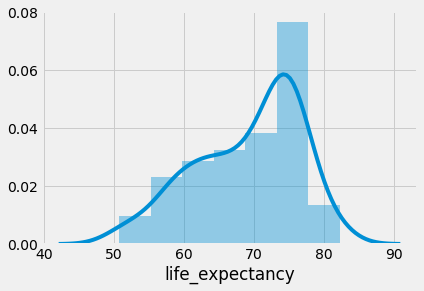

In [26]:
sns.distplot(plotting_df.life_expectancy);

In [68]:
def fixing_skewness(df1):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df1.dtypes[df1.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df1[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df1[feat] = boxcox1p(df1[feat], boxcox_normmax(df1[feat] + 1))

fixing_skewness(plotting_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


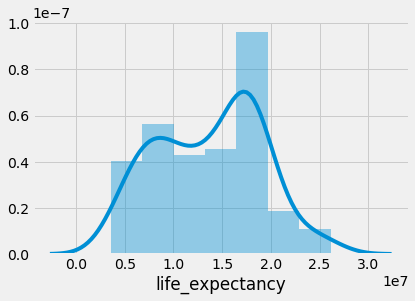

In [29]:
sns.distplot(plotting_df.life_expectancy);

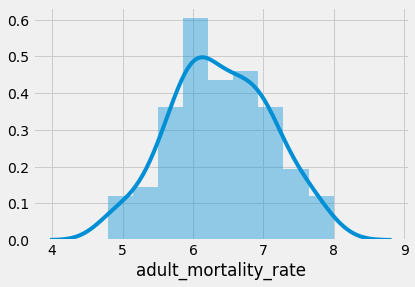

In [30]:
sns.distplot(plotting_df.adult_mortality_rate);

In [41]:
numeric_feats = plotting_df.dtypes[plotting_df.dtypes != "object"].index
skewed_feats = plotting_df[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_feats

total_population        1.000000
HIV_death_rate          0.113454
GDP                     0.019913
adult_mortality_rate   -0.001562
health_expense         -0.010404
life_expectancy        -0.032793
hep_B_immunity         -0.134366
polio_immunity         -0.221560
HDI                    -0.285832
BCG_immunity           -0.321843
dtype: float64